In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


Scikit-learn imports

In [2]:
from sklearn.decomposition import PCA

Data

In [3]:
x_train = np.load("../data/X_train.npy")
y_train = np.load("../data/y_train.npy", allow_pickle=True)

x_test = np.load("../data/x_test.npy")
y_test = np.load("../data/y_test.npy", allow_pickle=True)

Changing y values to int

In [4]:
y_train = [0 if x == "GALAXY" else x for x in y_train]
y_train = [1 if x == "QSO" else x for x in y_train]
y_train = [2 if x == "STAR" else x for x in y_train]

y_test = [0 if x == "GALAXY" else x for x in y_test]
y_test = [1 if x == "QSO" else x for x in y_test]
y_test = [2 if x == "STAR" else x for x in y_test]


In [5]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([44584, 14221, 16195], dtype=int64))

## Clustering Methods

### 2-D methods

We use 2-D methods because we can visualize them easily. We will used higher dimension clustering methods later on, but this is a good starting point

In [6]:
mean = np.mean(x_test,axis=0)
x_centered = x_test - mean[np.newaxis,:]

In [7]:
sigma = np.cov(x_centered, rowvar=False, ddof=1)
lam = np.linalg.eigvals(sigma)

[0.95942942 0.9980186  0.99965115 0.99990998 0.99995306 0.99998816
 0.99999271 1.        ]


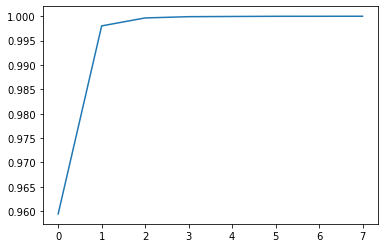

In [8]:
print(np.cumsum(lam)/np.sum(lam))
plt.plot(np.arange(len(lam)), np.cumsum(lam)/np.sum(lam))

In [9]:
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(x_test)

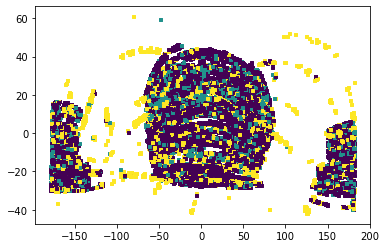

In [10]:
plt.scatter(pca_transform[:,0], pca_transform[:,1], marker="s", s=9, c=y_test)
#plt.axis([-200, 200,0,10])
plt.show()

From the plot, we can see that PCA on two dimension doesn't really give us much information. The classes are all shuffled together. We will try on three dimension since we can still visualize it.

In [11]:
pca_3d = PCA(n_components=3)
pca_transform_3d = pca_3d.fit_transform(x_test)
print(pca_transform_3d.shape)

(25000, 3)


<IPython.core.display.Javascript object>


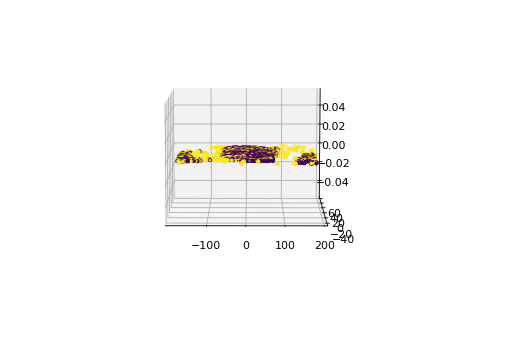

In [16]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.scatter(pca_transform_3d[:,0],pca_transform_3d[:,1], pca_transform_3d[:,2], c=y_test)
plt.show()

This does not give us much more information then the 2d PCA. After doing PCA, we decided to make plots with almost every pairs possible. There is not a ton of features, so it did not take long and it gave us a goid idea of what features are the most descriptive.

We found that the redshift had a lot of impact (index 7). In the following scatter plots, it is on the y axis. This gives us good indications that a tree based classifier would be a good idea

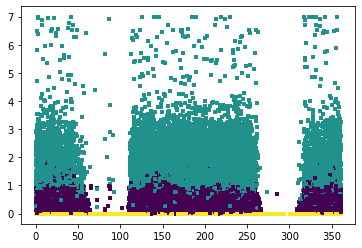

In [13]:
plt.scatter(x_train[:, 0], x_train[:, 7], marker="s", s=9, c=y_train)


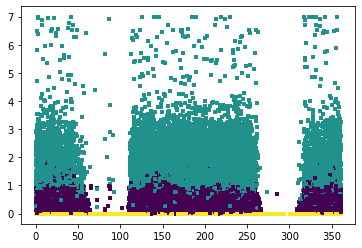

In [14]:

plt.scatter(x_train[:, 0], x_train[:, 7], marker="s", s=9, c=y_train)
#plt.axis([0,350,0,0.01])

In [15]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.scatter(x_train[:, 0], x_train[:, 7], x_train[:, 0], c=y_train)


<IPython.core.display.Javascript object>

We can determine that unsupervised techniques are not a good idea, because they don't seem to be linearly seperable